# Logistic Regression

Example code from Cory Maklin

https://towardsdatascience.com/logistic-regression-python-7c451928efee

### Import Libraries

In [9]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

### Generate Classification Data

We will use make_classification function from sklearn to generate our data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [10]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

Let's plot the $x$ and $y$ 

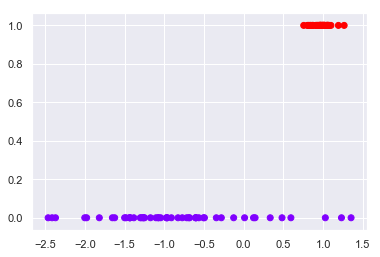

In [11]:
plt.scatter(x, y, c=y, cmap='rainbow')

Separate the data into training and testing

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

We create a logistic regressor as follows and built a model with our training data

In [13]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.

In [21]:
print(lr.coef_)
print(lr.intercept_)

[[2.56875954]]
[-0.827237]


The `predict()` function can be used to predict the probabilities

In [22]:
y_pred = lr.predict(x_test)

In [25]:
y_pred_proba = lr.predict_proba(x_test)

In [26]:
confusion_matrix(y_test, y_pred)

array([[11,  1],
       [ 0, 13]])

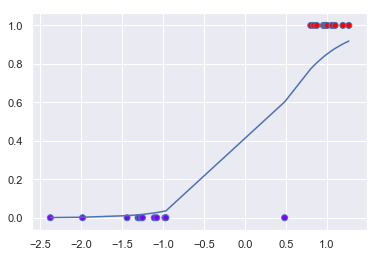

In [28]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')